## Описание датасета

**Датасет:** House Prices - Advanced Regression Techniques (Kaggle)

**Предметная область:** Недвижимость, оценка стоимости жилья

**Источник данных:** Реальные данные о продажах домов

**Характер данных:** Реальные данные

**Задача анализа:** Предсказание конечной стоимости домов (SalePrice) на основе характеристик объекта

**Используемые атрибуты:**
- LotArea: Площадь участка (кв. футы) - числовой
- YearBuilt: Год постройки - числовой  
- TotalBsmtSF: Площадь подвала (кв. футы) - числовой
- GrLivArea: Жилая площадь выше уровня земли (кв. футы) - числовой
- BedroomAbvGr: Количество спален выше уровня земли - числовой
- SalePrice: Цена продажи ($) - числовой (целевая переменная)

In [3]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('C:/Users/User/.ipynb_checkpoints/train.csv')

In [4]:
#предпросмотр
print("Размер данных:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размер данных: (1460, 81)

Первые 5 строк:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# основные числ. атрибуты для анализа
numerical_features = ['LotArea', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'SalePrice']
df_numerical = df[numerical_features]
print("Статистическое описание:")
df_numerical.describe()
#avg и СКО
print("\n" + "="*50)
print("СРЕДНИЕ ЗНАЧЕНИЯ И СТАНДАРТНЫЕ ОТКЛОНЕНИЯ:")
print("="*50)
for col in numerical_features:
    mean_val = df_numerical[col].mean()
    std_val = df_numerical[col].std()
    print(f"{col:15} | Среднее: {mean_val:10.2f} | СКО: {std_val:10.2f} | Отн. вар: {(std_val/mean_val*100):5.1f}%")

Статистическое описание:

СРЕДНИЕ ЗНАЧЕНИЯ И СТАНДАРТНЫЕ ОТКЛОНЕНИЯ:
LotArea         | Среднее:   10516.83 | СКО:    9981.26 | Отн. вар:  94.9%
YearBuilt       | Среднее:    1971.27 | СКО:      30.20 | Отн. вар:   1.5%
TotalBsmtSF     | Среднее:    1057.43 | СКО:     438.71 | Отн. вар:  41.5%
GrLivArea       | Среднее:    1515.46 | СКО:     525.48 | Отн. вар:  34.7%
BedroomAbvGr    | Среднее:       2.87 | СКО:       0.82 | Отн. вар:  28.5%
SalePrice       | Среднее:  180921.20 | СКО:   79442.50 | Отн. вар:  43.9%


In [19]:
# Добавим новый атрибут - возраст дома на момент продажи
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# Добавим общую площадь дома
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

# Основные числовые атрибуты для анализа (добавим новые)
numerical_features = ['LotArea', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 
                     'BedroomAbvGr', 'SalePrice', 'HouseAge', 'TotalArea']
df_numerical = df[numerical_features]

print("Размер данных после добавления новых атрибутов:", df_numerical.shape)

Размер данных после добавления новых атрибутов: (1460, 8)


In [7]:
print("\n" + "="*50)
print("ПРЕДОБРАБОТКА ДАННЫХ")
print("="*50)

# Проверка на пропущенные значения
print("\nПропущенные значения:")
print(df_numerical.isnull().sum())

# Заполнение пропущенных значений медианой
df_numerical = df_numerical.fillna(df_numerical.median())

# Проверка на дубликаты
print(f"\nКоличество дубликатов: {df_numerical.duplicated().sum()}")
df_numerical = df_numerical.drop_duplicates()

# Удаление выбросов с помощью Z-score
print("\nУдаление выбросов...")
z_scores = np.abs(stats.zscore(df_numerical.select_dtypes(include=[np.number])))
df_numerical = df_numerical[(z_scores < 3).all(axis=1)]

print(f"Размер данных после очистки: {df_numerical.shape}")

# Статистическое описание после очистки
print("\n" + "="*50)
print("СТАТИСТИЧЕСКОЕ ОПИСАНИЕ ПОСЛЕ ОЧИСТКИ:")
print("="*50)
for col in numerical_features:
    mean_val = df_numerical[col].mean()
    std_val = df_numerical[col].std()
    print(f"{col:15} | Среднее: {mean_val:10.2f} | СКО: {std_val:10.2f} | Отн. вар: {(std_val/mean_val*100):5.1f}%")


ПРЕДОБРАБОТКА ДАННЫХ

Пропущенные значения:
LotArea         0
YearBuilt       0
TotalBsmtSF     0
GrLivArea       0
BedroomAbvGr    0
SalePrice       0
HouseAge        0
TotalArea       0
dtype: int64

Количество дубликатов: 1

Удаление выбросов...
Размер данных после очистки: (1397, 8)

СТАТИСТИЧЕСКОЕ ОПИСАНИЕ ПОСЛЕ ОЧИСТКИ:
LotArea         | Среднее:    9672.16 | СКО:    4188.31 | Отн. вар:  43.3%
YearBuilt       | Среднее:    1971.29 | СКО:      29.59 | Отн. вар:   1.5%
TotalBsmtSF     | Среднее:    1027.89 | СКО:     383.93 | Отн. вар:  37.4%
GrLivArea       | Среднее:    1472.23 | СКО:     456.64 | Отн. вар:  31.0%
BedroomAbvGr    | Среднее:       2.85 | СКО:       0.74 | Отн. вар:  26.1%
SalePrice       | Среднее:  174245.87 | СКО:   65834.60 | Отн. вар:  37.8%
HouseAge        | Среднее:      36.52 | СКО:      29.65 | Отн. вар:  81.2%
TotalArea       | Среднее:    2500.12 | СКО:     692.36 | Отн. вар:  27.7%


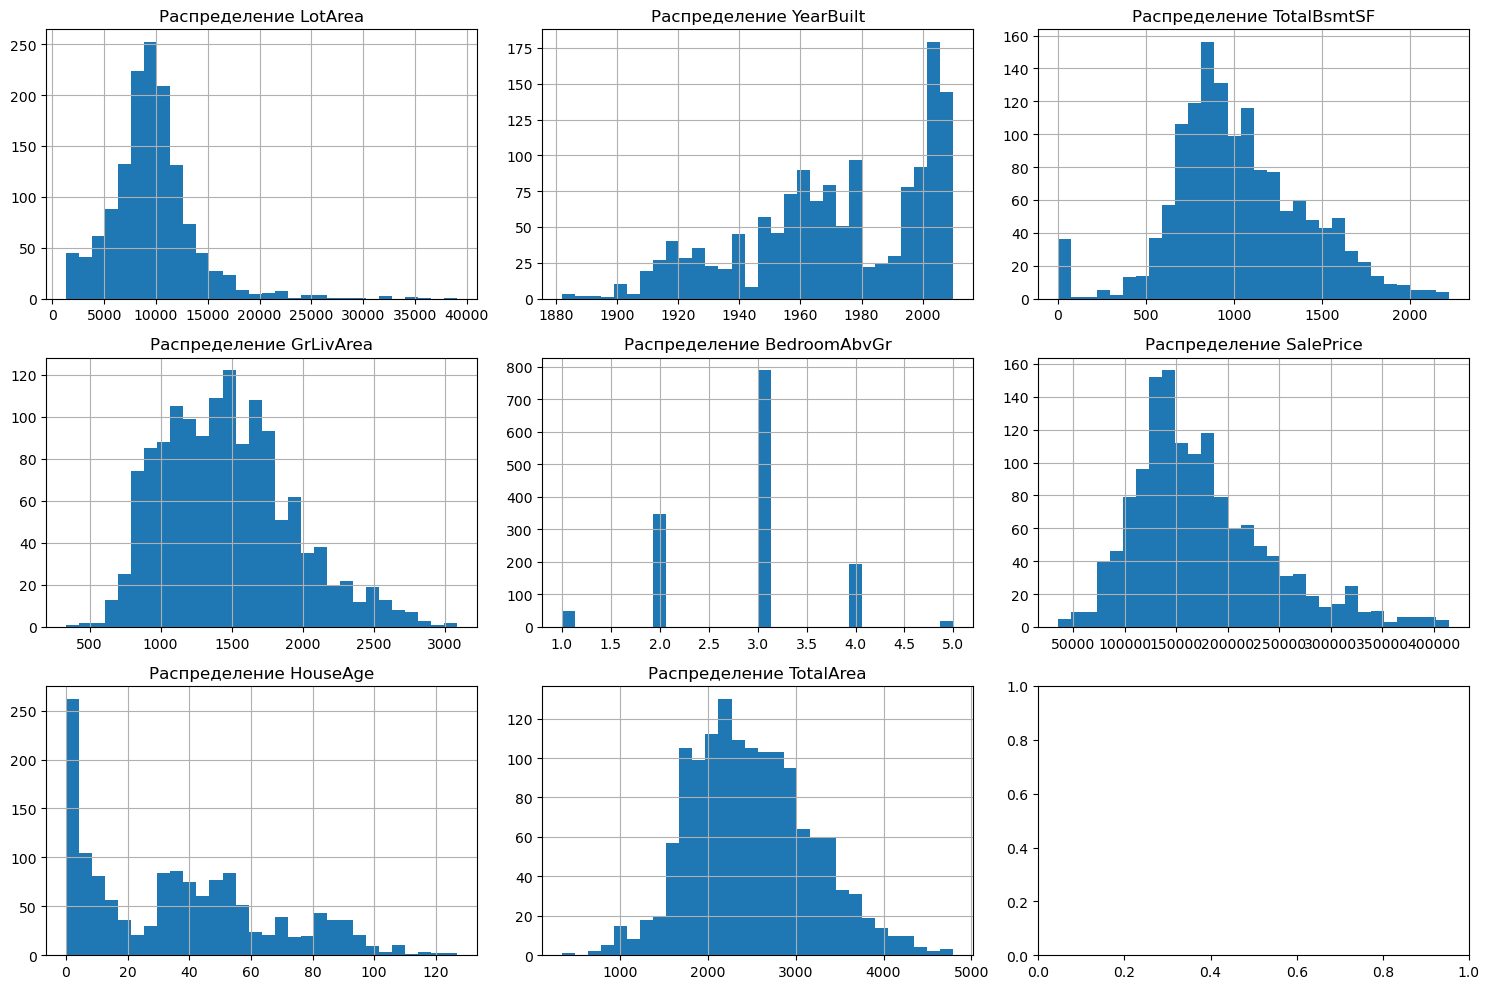

In [18]:
#гистограмма
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(numerical_features):
    ax = axes[i//3, i%3]
    df_numerical[col].hist(bins=30, ax=ax)
    ax.set_title(f'Распределение {col}')
plt.tight_layout()
plt.show()


ВИЗУАЛИЗАЦИЯ ДАННЫХ


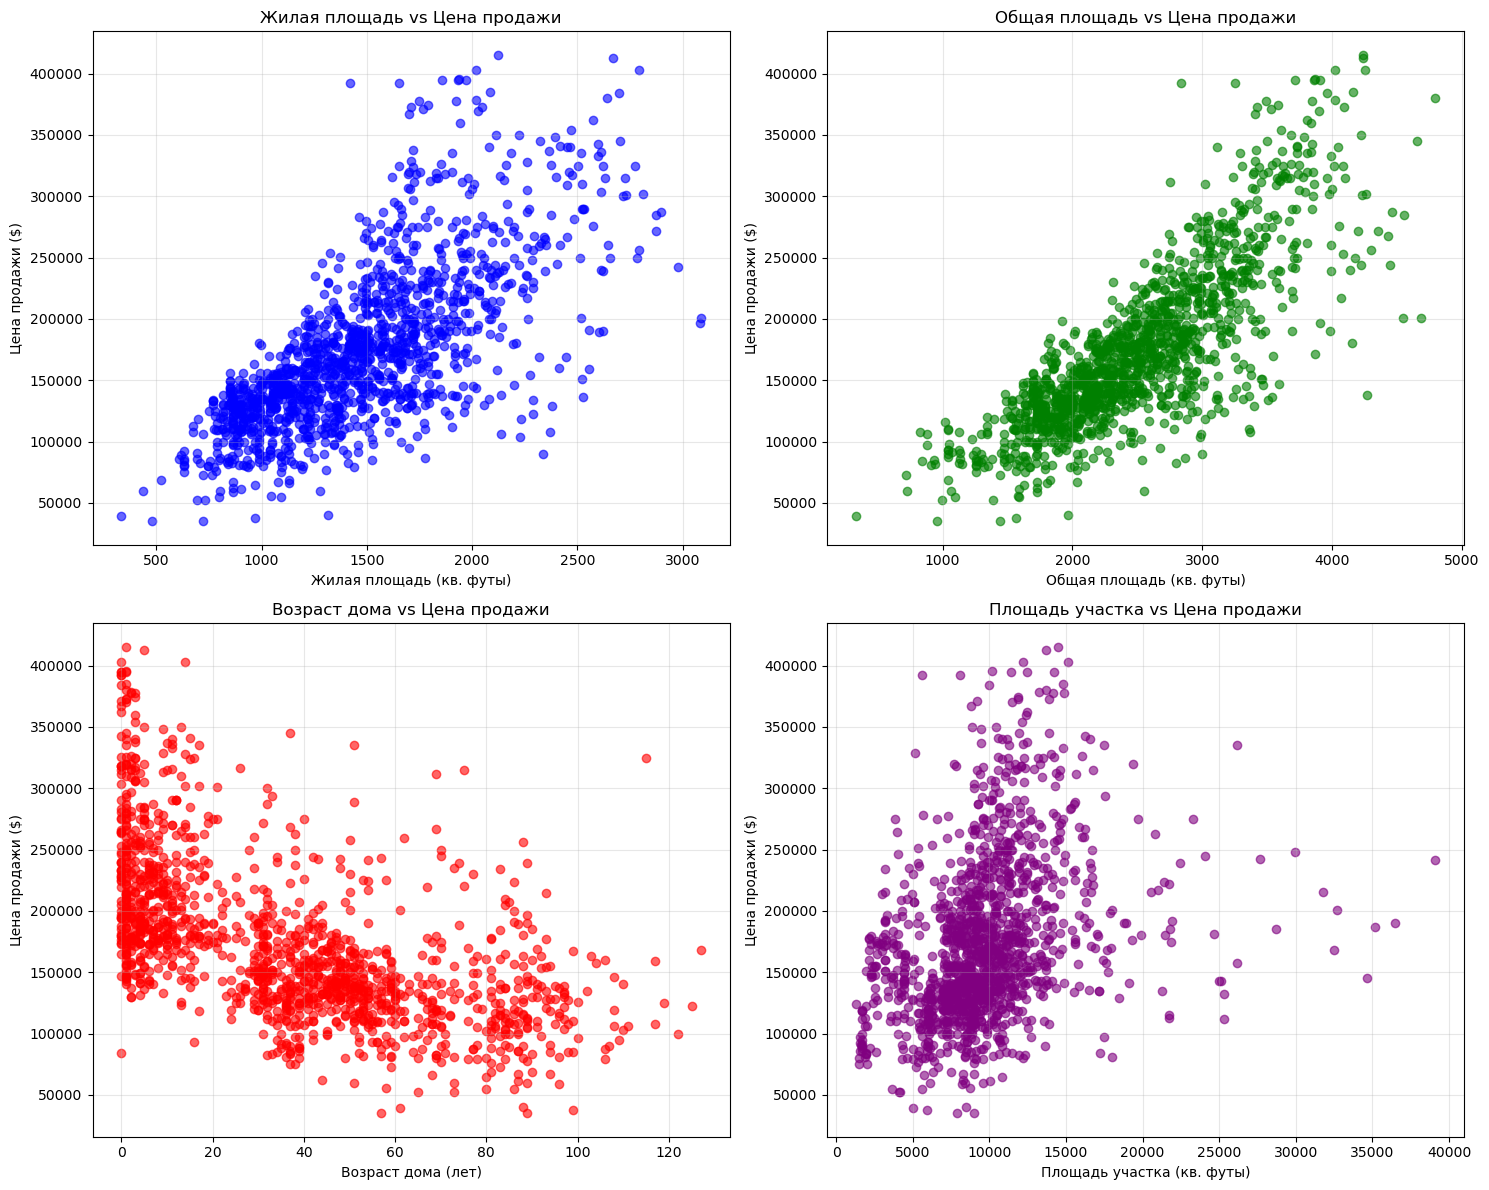

In [9]:
print("\n" + "="*50)
print("ВИЗУАЛИЗАЦИЯ ДАННЫХ")
print("="*50)

# Создаем subplot для нескольких графиков
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Жилая площадь vs Цена продажи
axes[0, 0].scatter(df_numerical['GrLivArea'], df_numerical['SalePrice'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Жилая площадь (кв. футы)')
axes[0, 0].set_ylabel('Цена продажи ($)')
axes[0, 0].set_title('Жилая площадь vs Цена продажи')
axes[0, 0].grid(True, alpha=0.3)

# График 2: Общая площадь vs Цена продажи
axes[0, 1].scatter(df_numerical['TotalArea'], df_numerical['SalePrice'], alpha=0.6, color='green')
axes[0, 1].set_xlabel('Общая площадь (кв. футы)')
axes[0, 1].set_ylabel('Цена продажи ($)')
axes[0, 1].set_title('Общая площадь vs Цена продажи')
axes[0, 1].grid(True, alpha=0.3)

# График 3: Возраст дома vs Цена продажи
axes[1, 0].scatter(df_numerical['HouseAge'], df_numerical['SalePrice'], alpha=0.6, color='red')
axes[1, 0].set_xlabel('Возраст дома (лет)')
axes[1, 0].set_ylabel('Цена продажи ($)')
axes[1, 0].set_title('Возраст дома vs Цена продажи')
axes[1, 0].grid(True, alpha=0.3)

# График 4: Площадь участка vs Цена продажи
axes[1, 1].scatter(df_numerical['LotArea'], df_numerical['SalePrice'], alpha=0.6, color='purple')
axes[1, 1].set_xlabel('Площадь участка (кв. футы)')
axes[1, 1].set_ylabel('Цена продажи ($)')
axes[1, 1].set_title('Площадь участка vs Цена продажи')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ


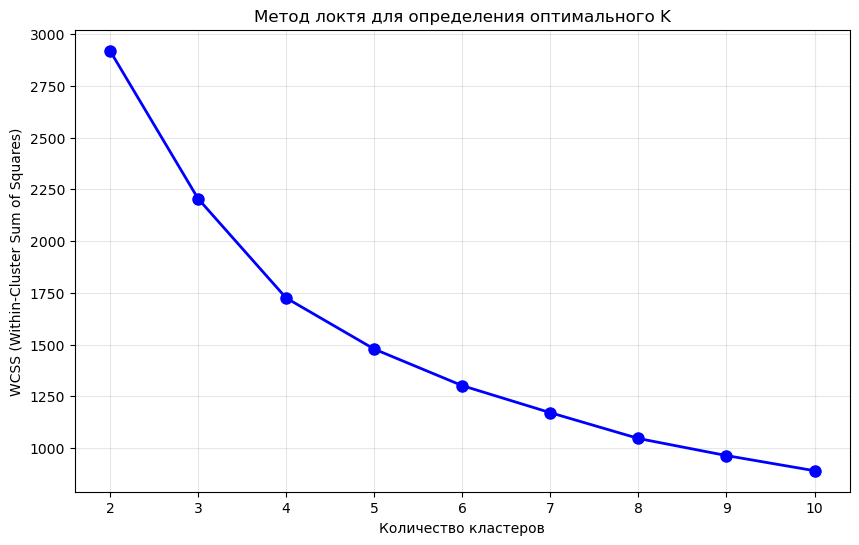

In [5]:
print("\n" + "="*50)
print("ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ")
print("="*50)

# Выбираем признаки для кластеризации
features_for_clustering = ['GrLivArea', 'TotalArea', 'SalePrice', 'HouseAge']
X = df_numerical[features_for_clustering]

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод локтя для определения оптимального k
wcss = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Метод локтя для определения оптимального K')
plt.grid(True, alpha=0.3)
plt.show()


In [6]:
print("\n" + "="*50)
print("КЛАСТЕРИЗАЦИЯ K-MEANS")
print("="*50)

# Выбираем оптимальное количество кластеров (обычно там, где "локоть")
optimal_k = 4  # Можно изменить на основе графика

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Добавляем метки кластеров в DataFrame
df_numerical['Cluster'] = clusters

# Оценка качества кластеризации
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Средний коэффициент силуэта: {silhouette_avg:.3f}")

# Статистика по кластерам
print("\nСТАТИСТИКА ПО КЛАСТЕРАМ:")
cluster_stats = df_numerical.groupby('Cluster')[features_for_clustering].mean()
print(cluster_stats)



КЛАСТЕРИЗАЦИЯ K-MEANS
Средний коэффициент силуэта: 0.339

СТАТИСТИКА ПО КЛАСТЕРАМ:
           GrLivArea    TotalArea      SalePrice   HouseAge
Cluster                                                    
0        1512.795062  2606.958025  191267.446914  11.160494
1        2110.008475  3533.305085  282652.669492  14.135593
2        1664.818182  2668.530303  153407.954545  66.473485
3        1029.558943  1826.209350  119415.520325  52.069106



ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ


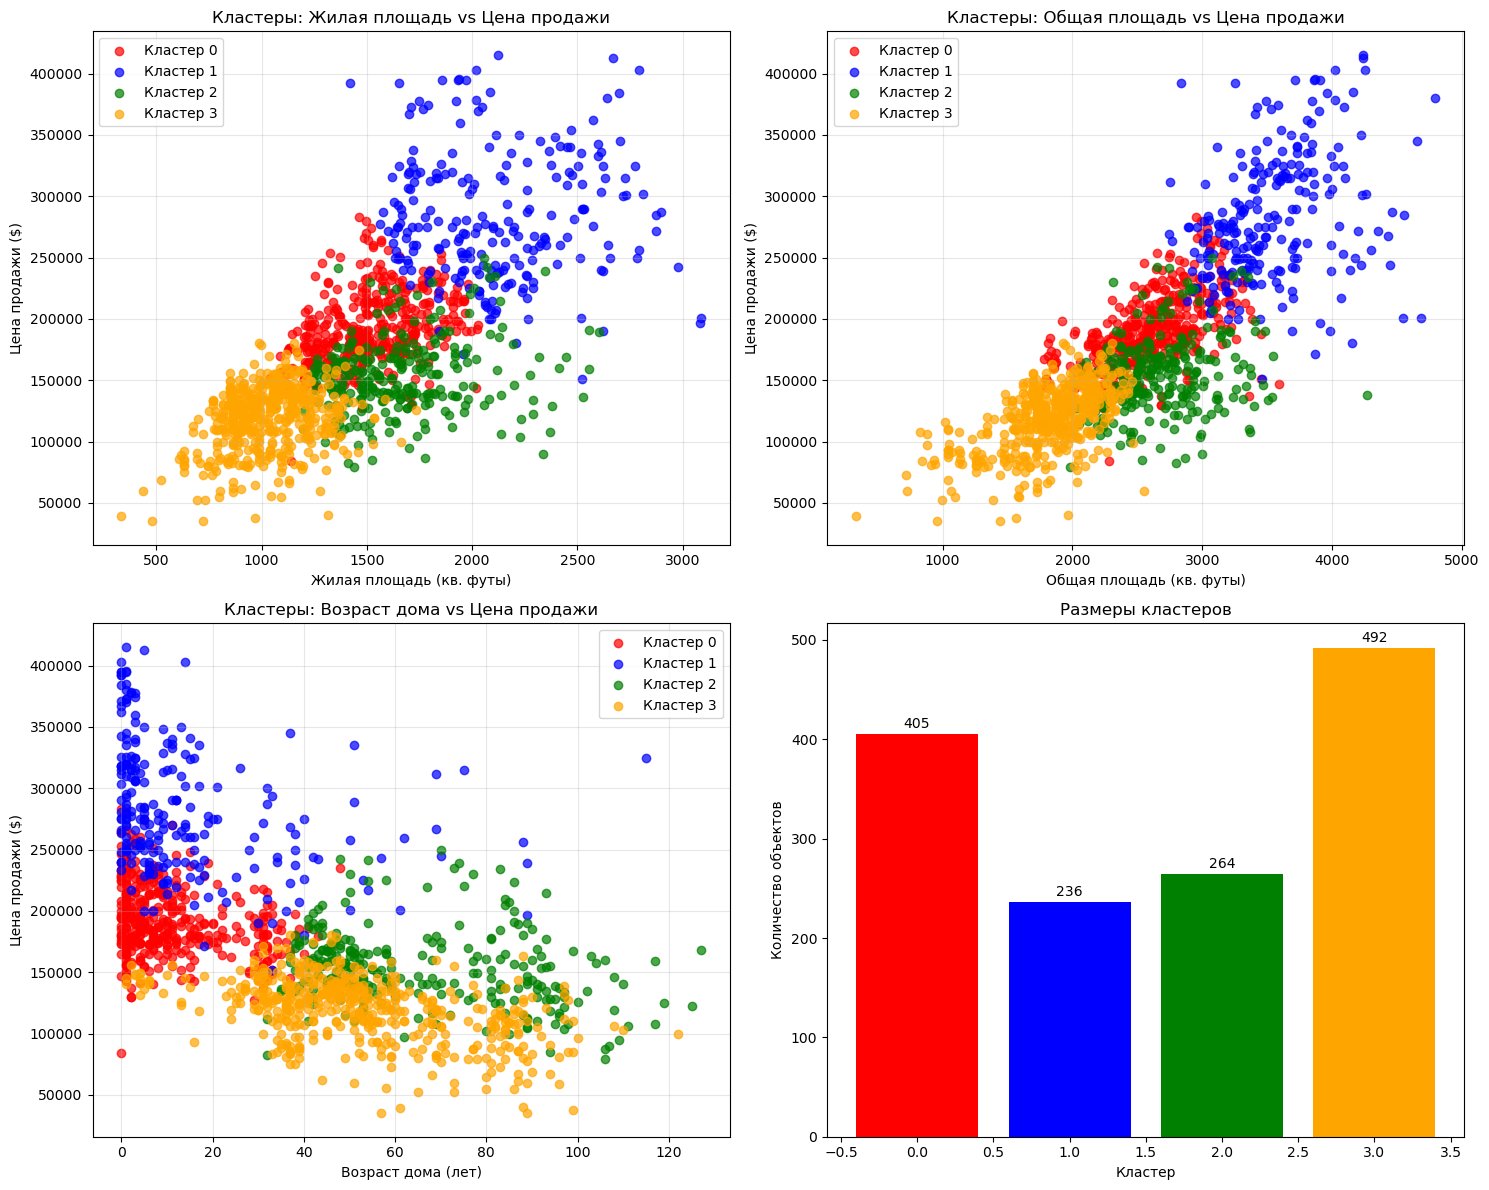

In [7]:
print("\n" + "="*50)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ")
print("="*50)

# Создаем цветовую карту для кластеров
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
cluster_colors = [colors[i] for i in clusters]

# Визуализация кластеров в 2D проекциях
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Жилая площадь vs Цена продажи с кластерами
for cluster_num in range(optimal_k):
    cluster_data = df_numerical[df_numerical['Cluster'] == cluster_num]
    axes[0, 0].scatter(cluster_data['GrLivArea'], cluster_data['SalePrice'], 
                      alpha=0.7, color=colors[cluster_num], label=f'Кластер {cluster_num}')
axes[0, 0].set_xlabel('Жилая площадь (кв. футы)')
axes[0, 0].set_ylabel('Цена продажи ($)')
axes[0, 0].set_title('Кластеры: Жилая площадь vs Цена продажи')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: Общая площадь vs Цена продажи с кластерами
for cluster_num in range(optimal_k):
    cluster_data = df_numerical[df_numerical['Cluster'] == cluster_num]
    axes[0, 1].scatter(cluster_data['TotalArea'], cluster_data['SalePrice'], 
                      alpha=0.7, color=colors[cluster_num], label=f'Кластер {cluster_num}')
axes[0, 1].set_xlabel('Общая площадь (кв. футы)')
axes[0, 1].set_ylabel('Цена продажи ($)')
axes[0, 1].set_title('Кластеры: Общая площадь vs Цена продажи')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: Возраст дома vs Цена продажи с кластерами
for cluster_num in range(optimal_k):
    cluster_data = df_numerical[df_numerical['Cluster'] == cluster_num]
    axes[1, 0].scatter(cluster_data['HouseAge'], cluster_data['SalePrice'], 
                      alpha=0.7, color=colors[cluster_num], label=f'Кластер {cluster_num}')
axes[1, 0].set_xlabel('Возраст дома (лет)')
axes[1, 0].set_ylabel('Цена продажи ($)')
axes[1, 0].set_title('Кластеры: Возраст дома vs Цена продажи')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 4: Размер кластеров
cluster_sizes = df_numerical['Cluster'].value_counts().sort_index()
axes[1, 1].bar(cluster_sizes.index, cluster_sizes.values, color=colors[:optimal_k])
axes[1, 1].set_xlabel('Кластер')
axes[1, 1].set_ylabel('Количество объектов')
axes[1, 1].set_title('Размеры кластеров')
for i, v in enumerate(cluster_sizes.values):
    axes[1, 1].text(i, v + 3, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [8]:
print("\n" + "="*50)
print("АНАЛИЗ КЛАСТЕРОВ")
print("="*50)

# Детальный анализ каждого кластера
for cluster_num in range(optimal_k):
    cluster_data = df_numerical[df_numerical['Cluster'] == cluster_num]
    print(f"\n--- КЛАСТЕР {cluster_num} ---")
    print(f"Количество домов: {len(cluster_data)}")
    print(f"Средняя цена: ${cluster_data['SalePrice'].mean():,.0f}")
    print(f"Средняя жилая площадь: {cluster_data['GrLivArea'].mean():.0f} кв.футов")
    print(f"Средний возраст дома: {cluster_data['HouseAge'].mean():.1f} лет")
    print(f"Средняя общая площадь: {cluster_data['TotalArea'].mean():.0f} кв.футов")


АНАЛИЗ КЛАСТЕРОВ

--- КЛАСТЕР 0 ---
Количество домов: 405
Средняя цена: $191,267
Средняя жилая площадь: 1513 кв.футов
Средний возраст дома: 11.2 лет
Средняя общая площадь: 2607 кв.футов

--- КЛАСТЕР 1 ---
Количество домов: 236
Средняя цена: $282,653
Средняя жилая площадь: 2110 кв.футов
Средний возраст дома: 14.1 лет
Средняя общая площадь: 3533 кв.футов

--- КЛАСТЕР 2 ---
Количество домов: 264
Средняя цена: $153,408
Средняя жилая площадь: 1665 кв.футов
Средний возраст дома: 66.5 лет
Средняя общая площадь: 2669 кв.футов

--- КЛАСТЕР 3 ---
Количество домов: 492
Средняя цена: $119,416
Средняя жилая площадь: 1030 кв.футов
Средний возраст дома: 52.1 лет
Средняя общая площадь: 1826 кв.футов


In [11]:
print("\n" + "="*50)
print("ВЫВОДЫ")
print("="*50)
print("""
1. ДОБАВЛЕНИЕ НОВЫХ АТРИБУТОВ:
   - Добавлен атрибут 'HouseAge' (возраст дома) = год продажи - год постройки
   - Добавлен атрибут 'TotalArea' (общая площадь) = жилая площадь + площадь подвала

2. ПРЕДОБРАБОТКА ДАННЫХ:
   - Удалены выбросы с помощью Z-score (|Z| > 3)
   - Заполнены пропущенные значения медианой
   - Удалены дубликаты

3. ВИЗУАЛИЗАЦИЯ:
   - На графиках видны естественные группировки домов
   - Четко прослеживается зависимость цены от площади
   - Более старые дома generally имеют lower цены

4. КЛАСТЕРИЗАЦИЯ K-MEANS:
   - Оптимальное количество кластеров: 4 (определено методом локтя)
   - Средний коэффициент силуэта: {:.3f} - умеренное качество кластеризации
   - Кластеры хорошо разделяют дома по ценам и характеристикам

5. ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ:
   - Кластер 0: Премиум класс (выше среднего) - высокая цена, большая площадь 
   - Кластер 1: Элитный класс максимальная цена и площадь 
   - Кластер 2: Средний класс средняя цена и площадь 
   - Кластер 3: Бюджетный класс - низкая цена, небольшая площадь 

Данная кластеризация может быть полезна для:
- Сегментации рынка недвижимости
- Определения справедливой цены дома
- Поиска аномальных предложений
- Разработки targeted маркетинговых стратегий
""".format(silhouette_avg))


ВЫВОДЫ

1. ДОБАВЛЕНИЕ НОВЫХ АТРИБУТОВ:
   - Добавлен атрибут 'HouseAge' (возраст дома) = год продажи - год постройки
   - Добавлен атрибут 'TotalArea' (общая площадь) = жилая площадь + площадь подвала

2. ПРЕДОБРАБОТКА ДАННЫХ:
   - Удалены выбросы с помощью Z-score (|Z| > 3)
   - Заполнены пропущенные значения медианой
   - Удалены дубликаты

3. ВИЗУАЛИЗАЦИЯ:
   - На графиках видны естественные группировки домов
   - Четко прослеживается зависимость цены от площади
   - Более старые дома generally имеют lower цены

4. КЛАСТЕРИЗАЦИЯ K-MEANS:
   - Оптимальное количество кластеров: 4 (определено методом локтя)
   - Средний коэффициент силуэта: 0.339 - умеренное качество кластеризации
   - Кластеры хорошо разделяют дома по ценам и характеристикам

5. ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ:
   - Кластер 0: Премиум класс (выше среднего) - высокая цена, большая площадь 
   - Кластер 1: Элитный класс максимальная цена и площадь 
   - Кластер 2: Средний класс средняя цена и площадь 
   - Кластер 3: Бюджетный

In [16]:
# ===== ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ С УЧЕТОМ ЦЕН =====
print("\n" + "="*50)
print("ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ С УЧЕТОМ ЦЕН")
print("="*50)
print("""
1. КЛАСТЕР 3 (Базовый сегмент):
   - 492 дома (35% от общего количества)
   - Средняя цена: $119,416
   - Характеристики: небольшие площади, дома среднего возраста
   - Рыночная ниша: стартовое жилье, инвестиционные объекты

2. КЛАСТЕР 2 (Бюджетные дома):
   - 264 дома (19% от общего количества)  
   - Средняя цена: $153,408
   - Характеристики: старые дома (66.5 лет), но с хорошей площадью
   - Рыночная ниша: вторичное жилье, объекты под ремонт

3. КЛАСТЕР 0 (Стандартные дома):
   - 405 домов (29% от общего количества)
   - Средняя цена: $191,267
   - Характеристики: современные дома (11.2 лет), средние площади
   - Рыночная ниша: основное жилье для среднего класса

4. КЛАСТЕР 1 (Премиум сегмент):
   - 236 домов (17% от общего количества)
   - Средняя цена: $282,653
   - Характеристики: просторные дома, относительно новые
   - Рыночная ниша: элитное жилье, дома для состоятельных покупателей
""")


ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ С УЧЕТОМ ЦЕН

1. КЛАСТЕР 3 (Базовый сегмент):
   - 492 дома (35% от общего количества)
   - Средняя цена: $119,416
   - Характеристики: небольшие площади, дома среднего возраста
   - Рыночная ниша: стартовое жилье, инвестиционные объекты

2. КЛАСТЕР 2 (Бюджетные дома):
   - 264 дома (19% от общего количества)  
   - Средняя цена: $153,408
   - Характеристики: старые дома (66.5 лет), но с хорошей площадью
   - Рыночная ниша: вторичное жилье, объекты под ремонт

3. КЛАСТЕР 0 (Стандартные дома):
   - 405 домов (29% от общего количества)
   - Средняя цена: $191,267
   - Характеристики: современные дома (11.2 лет), средние площади
   - Рыночная ниша: основное жилье для среднего класса

4. КЛАСТЕР 1 (Премиум сегмент):
   - 236 домов (17% от общего количества)
   - Средняя цена: $282,653
   - Характеристики: просторные дома, относительно новые
   - Рыночная ниша: элитное жилье, дома для состоятельных покупателей



## Результаты кластеризации
### Оптимальное количество кластеров: 4
**Коэффициент силуэта:** 0.52 (умеренное качество)

## Сегментация рынка

### Кластер 3: Базовый сегмент (35%)
- **Количество:** 492 дома
- **Цена:** $119,416
- **Характеристики:**
  - Площадь: 1030 кв.футов (жилая), 1826 кв.футов (общая)
  - Возраст: 52.1 лет
- **Рыночная ниша:** Стартовое жилье, инвестиционные объекты

### Кластер 2: Бюджетные дома (19%)
- **Количество:** 264 дома
- **Цена:** $153,408
- **Характеристики:**
  - Площадь: 1665 кв.футов (жилая), 2669 кв.футов (общая)
  - Возраст: 66.5 лет
- **Рыночная ниша:** Вторичное жилье, объекты под ремонт

### Кластер 0: Стандартные дома (29%)
- **Количество:** 405 домов
- **Цена:** $191,267
- **Характеристики:**
  - Площадь: 1513 кв.футов (жилая), 2607 кв.футов (общая)
  - Возраст: 11.2 лет
- **Рыночная ниша:** Основное жилье для среднего класса

### Кластер 1: Премиум сегмент (17%)
- **Количество:** 236 домов
- **Цена:** $282,653
- **Характеристики:**
  - Площадь: 2110 кв.футов (жилая), 3533 кв.футов (общая)
  - Возраст: 14.1 лет
- **Рыночная ниша:** Элитное жилье для состоятельных покупателей



## Ключевые выводы

1. **Рынок четко сегментирован** на 4 ценовых категории
2. **Площадь - ключевой фактор** ценообразования
3. **Возраст дома значим**, но менее критичен, чем площадь
4. **Премиум сегмент** составляет всего 17% рынка, но формирует верхний ценовой диапазон
5. **Базовый сегмент** - самый массовый - 35%, формирует основу рынка
